# Introduction to Network Analysis: Graph Analysis

-----

In this notebook, we build on the first lesson to begin analyzing graphs by using the networkx library. Graphs can be large and complex since they will are not simply data but also the relationships between the data. As a result, the subject of graph or [network analysis][wna] is quite complex and we will only skim the surface. In this notebook we demonstrate basic graph traversal, computing properties of nodes and edges, quickly building graphs by using generators, and  combining graphs. Finally, we will perform basic graph analysis before exploring a sample graph that is included with the networkx library.

-----
[wna]: https://en.wikipedia.org/wiki/Network_science

## Table of Contents

[Sample Graph Data](#Sample-Graph-Data)

[Graph Operations](#Graph-Operations)

[Graph Generators](#Graph-Generators)

[Graph Input/Output](#Graph-Input/Output)

[Graph Analysis](#Graph-Analysis)

[Demo Graph](#Demo-Graph)

-----

Before proceeding with the rest of this notebook, we first include the notebook setup code.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

-----

[[Back to TOC]](#Table-of-Contents)

##  Sample Graph Data

To demonstrate analyzing a graph, we first construct a simple path graph of ten nodes, with the nodes connected sequentially. Afterwards, we display the number of edges per node, the degree of each node, and the weight of each edge.

-----

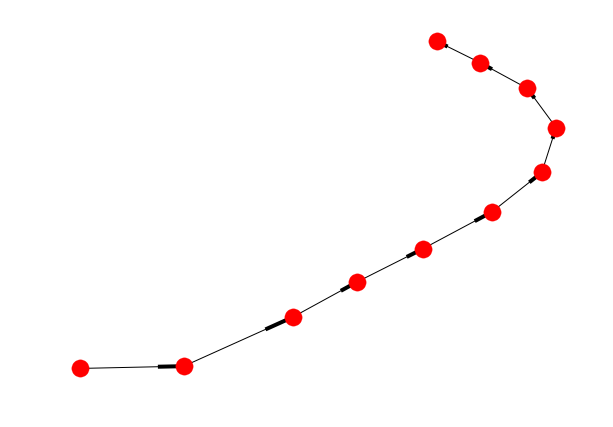

In [2]:
import networkx as nx

# Make a directed graph to traverse

dg = nx.DiGraph()  
dg.add_nodes_from(range(10))

dg.add_weighted_edges_from([(idx, idx + 1, (idx + 1) * 10)
                           for idx in range(dg.order())])

nx.draw(dg) 

In [3]:
# Display number of edges for each node

fmt_str = 'Node {0} has {1} edge(s)'
for node in dg.nodes():
    print(fmt_str.format(node, dg.degree(node)))

Node 0 has 1 edge(s)
Node 1 has 2 edge(s)
Node 2 has 2 edge(s)
Node 3 has 2 edge(s)
Node 4 has 2 edge(s)
Node 5 has 2 edge(s)
Node 6 has 2 edge(s)
Node 7 has 2 edge(s)
Node 8 has 2 edge(s)
Node 9 has 2 edge(s)
Node 10 has 1 edge(s)


In [4]:
# Display node degrees (connections)

fmt_str = 'Node {0} has degree {1}'
for node in dg.nodes_iter():
    print(fmt_str.format(node, dg.degree(node)))

Node 0 has degree 1
Node 1 has degree 2
Node 2 has degree 2
Node 3 has degree 2
Node 4 has degree 2
Node 5 has degree 2
Node 6 has degree 2
Node 7 has degree 2
Node 8 has degree 2
Node 9 has degree 2
Node 10 has degree 1


In [5]:
# Display node connections with weights

fmt_str = 'Node {0} connected to Node {1} with Weight {2}'
for n, m, attr in dg.edges(data=True):
    print(fmt_str.format(n, m, attr['weight']))

Node 0 connected to Node 1 with Weight 10
Node 1 connected to Node 2 with Weight 20
Node 2 connected to Node 3 with Weight 30
Node 3 connected to Node 4 with Weight 40
Node 4 connected to Node 5 with Weight 50
Node 5 connected to Node 6 with Weight 60
Node 6 connected to Node 7 with Weight 70
Node 7 connected to Node 8 with Weight 80
Node 8 connected to Node 9 with Weight 90
Node 9 connected to Node 10 with Weight 100


-----

[[Back to TOC]](#Table-of-Contents)

## Graph Operations

Given one or more graphs, there are [different operations][nop] that can be performed as supported by the networkx library. For example, multiple graphs can be easily joined when there are no nodes in common (`union`). If there are overlaps, they can be ignored  (`compose`) or new nodes made to account for each duplicate (`disjoint_union`). The complement (an inverse) of a graph can be constructed (`complement`), subgraphs can be constructed by specifying nodes to extract from a graph, and cartesian products of two graphs (`cartesian_product`). 

-----
[nop]: https://networkx.github.io/documentation/latest/reference/algorithms.operators.html

In [6]:
# Make three graphs
g1 = nx.Graph()
g1.add_nodes_from(range(6))

g2 = nx.Graph()
g2.add_nodes_from(range(6, 12))

g3 = nx.Graph()
g3.add_nodes_from(range(3, 11))

print('Nodes in Graph 1:', g1.nodes())
print('Nodes in Graph 2:', g2.nodes())
print('Nodes in Graph 3:', g3.nodes())

# Combine graphs with no overlaps
gu = nx.union(g1, g2)
print('\nNodes in Union of Graphs 1 and 2:', gu.nodes())

# Combine graphs with possible overlaps
gcm = nx.compose(g1, g3)
print('\nNodes in Composition of Graphs 1 and 3:', gcm.nodes())

# Make a subgraph, of specific nodes
gsg = nx.subgraph(gu, g3)
print('\nSubgraph (g3 nodes) from Union of Graphs 1 and 2:', gsg.nodes())

# Disjoint union treats each node as distinct.
gdu = nx.disjoint_union(g1, g3)
print('\nNodes in Disjoint Union of Graphs 1 and 3:', gdu.nodes())

print('\nCaretsian Product of Graphs 1 and 2')
gcp = nx.cartesian_product(g1, g2)

import pprint
pp = pprint.PrettyPrinter(indent=2, depth=2, width=54, compact=True)

pp.pprint(gcp.nodes())

Nodes in Graph 1: [0, 1, 2, 3, 4, 5]
Nodes in Graph 2: [6, 7, 8, 9, 10, 11]
Nodes in Graph 3: [3, 4, 5, 6, 7, 8, 9, 10]

Nodes in Union of Graphs 1 and 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Nodes in Composition of Graphs 1 and 3: [3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2]

Subgraph (g3 nodes) from Union of Graphs 1 and 2: [3, 4, 5, 6, 7, 8, 9, 10]

Nodes in Disjoint Union of Graphs 1 and 3: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Caretsian Product of Graphs 1 and 2
[ (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11),
  (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11),
  (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11),
  (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11),
  (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11),
  (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)]


Edges in Graph h: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]


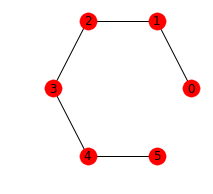

In [7]:
# Make a siomple path graph
h = nx.path_graph(6)
print('Edges in Graph h:', h.edges())

fig, axs = plt.subplots(figsize=(3, 3))
nx.draw_circular(h, with_labels=True, ax=axs)

Edges in Complement of Graph h:
[ (0, 2), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4),
  (1, 5), (2, 4), (2, 5), (3, 5)]


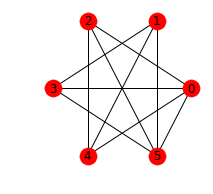

In [8]:
# Compute and display the graph complement
hc = nx.complement(h)
print('Edges in Complement of Graph h:')
pp.pprint(hc.edges())

fig, axs = plt.subplots(figsize=(3, 3))
nx.draw_circular(hc, with_labels=True, ax=axs)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we introduced several basic graph operators. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Try adding more nodes and edges to the original graphs. Recalculate the graph operators such as unions, compositions, and products of these new graphs.  

2. Try making new graphs and computing the graph complement. Does the complement appear as you expect given the original graph?

-----

[[Back to TOC]](#Table-of-Contents)

## Graph Generators

In some cases, we simply need to create a graph for specific analyses or simple demonstrations. The networkx library provides _generators_ for a number of different types of graphs. These generators can be classified as _simple_, _classic_, or _stochastic_. The classic graphs are frequently used as they include the _complete_ and _complete bipartite_ graphs, as well as the _barbell_ and _lollipop_ graphs. In the following Code cells, we use several of these different generators to quickly make and display different types of graphs.

-----

Peterson Graph Edges:

[ (0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3),
  (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8),
  (6, 8), (6, 9), (7, 9)]


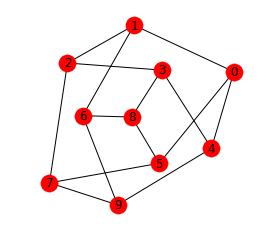

In [9]:
# Make a Petersen graph and display

pg = nx.petersen_graph()
print('Peterson Graph Edges:\n')
pp.pprint(pg.edges())

fig, axs = plt.subplots(figsize=(4, 4))
nx.draw(pg, with_labels=True, ax=axs)  

CG Edges:
[ (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2),
  (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5),
  (3, 4), (3, 5), (4, 5)]


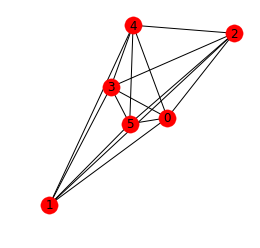

In [10]:
# Make a complete graph and display

cg = nx.complete_graph(6)  
print('CG Edges:')
pp.pprint(cg.edges())

fig, axs = plt.subplots(figsize=(4, 4))
nx.draw(cg, with_labels=True, ax=axs)

CBG Edges:
[(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4)]


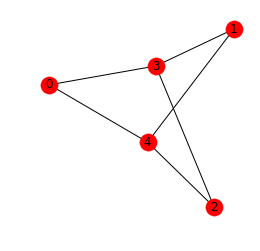

In [11]:
# Make a complete bipartite graph and display

cbg = nx.complete_bipartite_graph(3, 2)
print('CBG Edges:')
pp.pprint(cbg.edges())

fig, axs = plt.subplots(figsize=(4, 4))
nx.draw(cbg, with_labels=True, ax=axs)

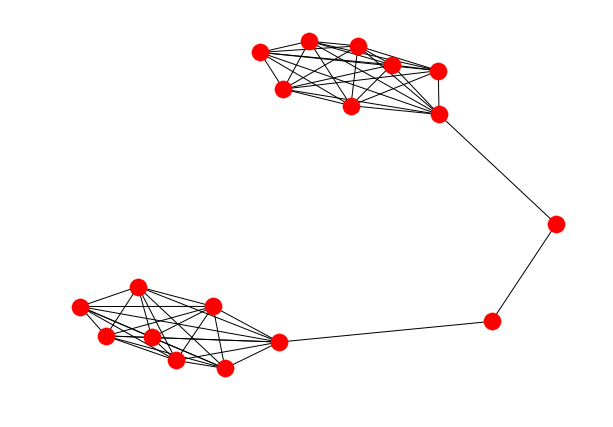

In [12]:
# Make a barbell graph and display

barbell = nx.barbell_graph(8, 2)  
nx.draw(barbell)

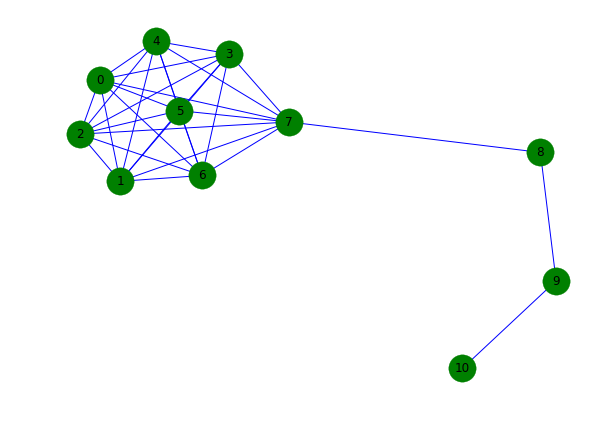

In [13]:
# Make a lollipop graph and display (changing the node and edge colors)

lg = nx.lollipop_graph(8, 3)

nx.draw(lg, with_labels=True, node_color='g', node_size=750, edge_color='b')

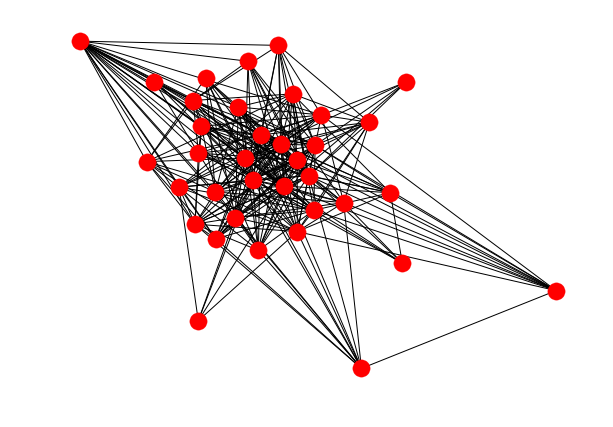

In [14]:
# Make a Barabási–Albert graph and display

ba = nx.barabasi_albert_graph(36, 12)
nx.draw(ba)

-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we introduced several graph generators.  Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the number of nodes (and other parameters as appropriate) for the previous graph generators. How do the resulting graphs change?
2. Try creating other simple graphs like petersen, tutte, sedgewick_maze, or tetrahedral.
3. Try creating other stochastic graphs via the appropriate generator such as erdos renyi, watts strogatz, or random lobster.

-----

[[Back to TOC]](#Table-of-Contents)

## Graph Input/Output

When working with graphs, it is often important to save the data to share or use later in another application. For example, when  working with twitter data, we often will want to cache the data to avoid the Twitter rate limits. The networkx library [supports reading and writing][nrw] graph data (or a subset of the graph data such as the nodes or edges) to a number of different formats, including

- GML, or graph markup language
- GEXF, or Graph Exchange XML Format
- GraphML
- JSON
- GIS Shapefile

and of course, you can also pickle graphs. Below we demonstrate this capability, by first creating a simple graph and writing it to a temporary file. We demonstrate this file exists by using the Unix list files command (`ls -la`), before reading the graph into a new variable and displaying the recovered graph.

-----
[nrw]: https://networkx.github.io/documentation/latest/reference/readwrite.html

In [15]:
# Make a demo graph and write to a file.
tcg = nx.complete_graph(12)
nx.write_gml(tcg, 'tmp-cg.dat')

In [16]:
!ls -la tmp-cg.dat

-rw-r--r-- 1 data_scientist users 3046 Oct 31 20:37 tmp-cg.dat


CG Edges:
[ (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6),
  (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 2),
  (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8),
  (1, 9), (1, 10), (1, 11), (2, 3), (2, 4), (2, 5),
  (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11),
  (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9),
  (3, 10), (3, 11), (4, 5), (4, 6), (4, 7), (4, 8),
  (4, 9), (4, 10), (4, 11), (5, 6), (5, 7), (5, 8),
  (5, 9), (5, 10), (5, 11), (6, 7), (6, 8), (6, 9),
  (6, 10), (6, 11), (7, 8), (7, 9), (7, 10), (7, 11),
  (8, 9), (8, 10), (8, 11), (9, 10), (9, 11),
  (10, 11)]


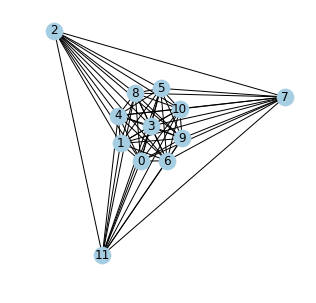

In [17]:
# Read a graph from a file and display.
ncg = nx.read_gml('tmp-cg.dat')

print('CG Edges:')
pp.pprint(tcg.edges())

clrs = sns.color_palette("Paired")

fig, axs = plt.subplots(figsize=(5, 5))

nx.draw(tcg, with_labels=True, node_color=clrs[0], ax=axs)

-----

[[Back to TOC]](#Table-of-Contents)

## Graph Analysis

So far, we have only created graphs. The power of network analysis, however, is in analyzing the properties of graphs to gain insight into the underlying data. This can include finding clusters of nodes, computing path distances between nodes, and finding properties of the entire graph or of collections of nodes. The networkx library provides a wide range of basic graph analysis methodology, which is demonstrated in the rest of this notebook. First, we analyze the lollipop graph to identify clusters. In this case, there is one cluster and points are inside it (value of 1), outside (value of 0), or on the border (fractional value). Next, we create a special graph and identify the connected components.

-----

{ 0: 1.0,
  1: 1.0,
  2: 1.0,
  3: 1.0,
  4: 1.0,
  5: 1.0,
  6: 1.0,
  7: 0.75,
  8: 0.0,
  9: 0.0,
  10: 0.0}


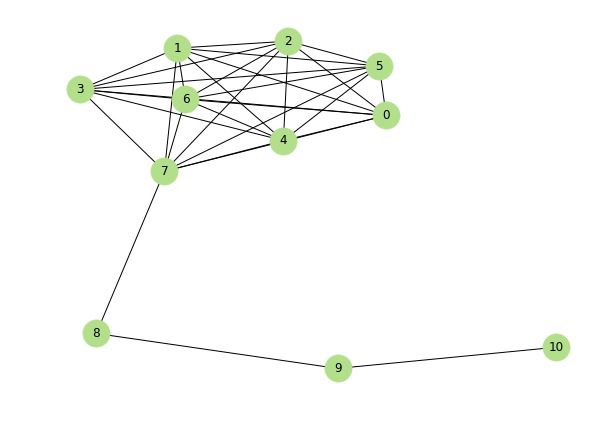

In [18]:
# Apply clustering to lollipop graph
pp.pprint(nx.clustering(lg))

nx.draw(lg, with_labels=True, node_color=clrs[2], node_size=750)

Connected Group 0 has 1 nodes: {0}
Connected Group 1 has 3 nodes: {1, 2, 3}
Connected Group 2 has 3 nodes: {4, 5, 6}
Connected Group 3 has 2 nodes: {8, 7}


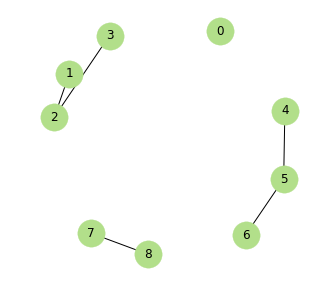

In [19]:
# Create graph and walk connected components
g = nx.Graph()
g.add_nodes_from(range(8))
g.add_edges_from([(1, 2), (2, 3), (4, 5), (5, 6), (7, 8)])

fig, axs = plt.subplots(figsize=(5, 5))
nx.draw(g, with_labels=True, node_color=clrs[2], node_size=750, ax=axs)

for idx, nds in enumerate(nx.connected_components(g)):
    print(f'Connected Group {idx} has {len(nds)} nodes: {nds}')

-----

The networkx library has a number of build-in graph analysis methods, which can be used to find properties of the graph, such as the `center` or `radius`, but also to compute paths between nodes. For example, one commonly required task is to compute the shortest path between nodes, which can include weights from the edges (which might be miles between cities). In the following cll, we modify the previous graph to make a special graph that has nodes with varying path lengths. In the following cells, we compute and display several graph properties before computing the shortest paths between each pair of nodes. Finally, we compute the number of paths of a given length that connect all pairs of nodes.

-----

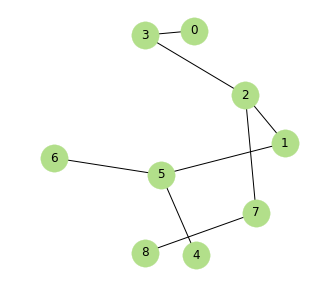

In [20]:
# Compute shortest paths
g.add_edges_from([(0, 3), (2, 7), (1, 5)])

fig, axs = plt.subplots(figsize=(5, 5))
nx.draw(g, with_labels=True, node_color=clrs[2], node_size=750, ax=axs)

In [21]:
# Display grpah properties
print(f'Graph Radius: {nx.radius(g):3.1f}')
print(f'Graph Diameter: {nx.diameter(g):3.1f}')
print(f'Graph Eccentricity: {nx.eccentricity(g)}')
print(f'Graph Center: {nx.center(g)}')
print(f'Graph Periphery: {nx.periphery(g)}')
print(f'Graph Density: {nx.density(g):4.3f}')

Graph Radius: 3.0
Graph Diameter: 5.0
Graph Eccentricity: {0: 5, 1: 3, 2: 3, 3: 4, 4: 5, 5: 4, 6: 5, 7: 4, 8: 5}
Graph Center: [1, 2]
Graph Periphery: [0, 4, 6, 8]
Graph Density: 0.222


In [22]:
# Display graphs
path_lengths=[]

print("Starting Node {End Node : Length, ... }")
for node in g.nodes():
    spl= nx.single_source_shortest_path_length(g, node)
    print(f'{node} {spl}')
    for path in spl.values():
        path_lengths.append(path)

aspl = sum(path_lengths)/len(path_lengths)
print(f'\nAverage shortest Path Length = {aspl:4.3f}')

Starting Node {End Node : Length, ... }
0 {0: 0, 3: 1, 2: 2, 1: 3, 7: 3, 5: 4, 8: 4, 4: 5, 6: 5}
1 {1: 0, 2: 1, 5: 1, 3: 2, 7: 2, 4: 2, 6: 2, 0: 3, 8: 3}
2 {2: 0, 1: 1, 3: 1, 7: 1, 5: 2, 0: 2, 8: 2, 4: 3, 6: 3}
3 {3: 0, 2: 1, 0: 1, 1: 2, 7: 2, 5: 3, 8: 3, 4: 4, 6: 4}
4 {4: 0, 5: 1, 6: 2, 1: 2, 2: 3, 3: 4, 7: 4, 0: 5, 8: 5}
5 {5: 0, 4: 1, 6: 1, 1: 1, 2: 2, 3: 3, 7: 3, 0: 4, 8: 4}
6 {6: 0, 5: 1, 4: 2, 1: 2, 2: 3, 3: 4, 7: 4, 0: 5, 8: 5}
7 {7: 0, 8: 1, 2: 1, 1: 2, 3: 2, 5: 3, 0: 3, 4: 4, 6: 4}
8 {8: 0, 7: 1, 2: 2, 1: 3, 3: 3, 5: 4, 0: 4, 4: 5, 6: 5}

Average shortest Path Length = 2.420


In [23]:
# Accumulate number of paths in graph of given length

lengths = {}
for path in path_lengths:
    if path in lengths:
        lengths[path] += 1
    else:
        lengths[path] = 1

print("Length : Number of Paths")
for length in sorted(lengths.keys()):
    print(f'  {length}    :    {lengths[length]:2d}')

Length : Number of Paths
  0    :     9
  1    :    16
  2    :    18
  3    :    16
  4    :    14
  5    :     8


-----

Another important concept in graphs is natural groupings, which are known as _cliques_. The networkx library provides methods to find cliques, which may or may not be useful for a particular analysis (in other words, you may need have to provide specific functionality  if the networkx methods are not sufficient). Below we compute the number of _maximal_ cliques and then display the different cliques.

-----

In [24]:
# Graph Cliques
print(f'Total number of maximal cliques = {nx.graph_number_of_cliques(g)}')
print(f'Node {nx.graph_clique_number(g)} is in the most maximal cliques.\n')

for clique in nx.find_cliques(g):
    print(clique)

Total number of maximal cliques = 8
Node 2 is in the most maximal cliques.

[0, 3]
[2, 1]
[2, 3]
[2, 7]
[4, 5]
[5, 1]
[5, 6]
[8, 7]


-----

<font color='red' size = '5'> Student Exercise </font>


In the preceding cells, we introduced several basic graph analysis techniques. Now that you have run the notebook, go back and make the following changes to see how the results change.

Make a new graph with 100 nodes, Add edges between pairs of even nodes and pairs of odd nodes. Next add edges between nodes that are evenly divisible by three.

1. Plot your new graph. 
2. Compute the clustering on this new graph.  Do the results make sense?
3. Compute graph statistics such as `radius`, and `density`. Do they make sense?
4. Find cliques in this new graph, do they make sense?

-----

[[Back to TOC]](#Table-of-Contents)

## Demo Graph

The networkx library comes with several data sets, which can be used to demonstrate basic graph analysis. Below we use one of these data sets, the _Davis Women's club_ data. This data has relationships between the different women, and also who attended which club event. Below we first display a histogram of the number of connections between the women before computing the number of friends for each woman (we use a bipartite graph to simplify this calculation). Finally, we conclude this demo by displaying the graph and computing the number of shard connections, via the number of meetings each woman attended and the number of other women at those meetings.

-----

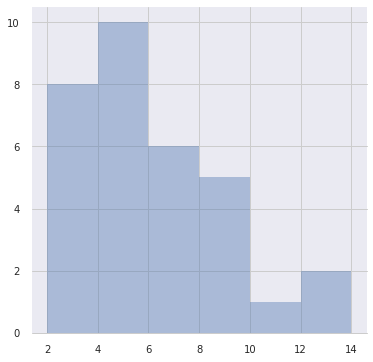

In [25]:
# Following NetworkX demo code
# http://networkx.readthedocs.org/en/networkx-1.11/examples/algorithms/davis_club.html

sample_graph = nx.davis_southern_women_graph()

edges = list(nx.degree(sample_graph).values())

fig, axs = plt.subplots(figsize=(6, 6))

sns.set(style='white')
sns.distplot(edges, kde=False)
sns.despine(offset=5)

In [26]:
import networkx.algorithms.bipartite as bipartite

women = sample_graph.graph['top']

# We make a bipartite graph linking each individual woman to the other women
bpg = bipartite.projected_graph(sample_graph, women)
print(f'{"Member":25s} : # Friends')
print(40*'-')

for woman in women:
    print(f'{woman:25s} : {bpg.degree(woman):2d}')

Member                    : # Friends
----------------------------------------
Evelyn Jefferson          : 17
Laura Mandeville          : 15
Theresa Anderson          : 17
Brenda Rogers             : 15
Charlotte McDowd          : 11
Frances Anderson          : 15
Eleanor Nye               : 15
Pearl Oglethorpe          : 16
Ruth DeSand               : 17
Verne Sanderson           : 17
Myra Liddel               : 16
Katherina Rogers          : 16
Sylvia Avondale           : 17
Nora Fayette              : 17
Helen Lloyd               : 17
Dorothy Murchison         : 16
Olivia Carleton           : 12
Flora Price               : 12


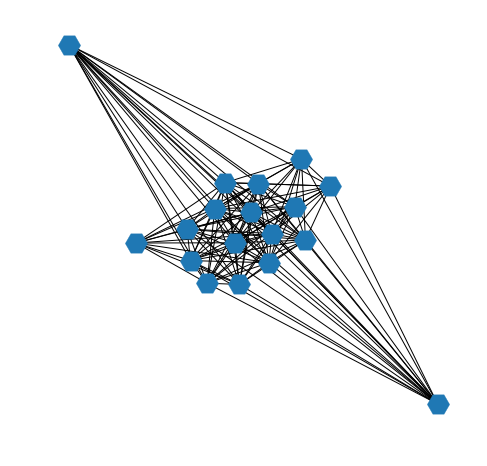

In [27]:
# Plot the connections between the women.
# Use different plot markers http://matplotlib.org/api/markers_api.html

fig, axs = plt.subplots(figsize=(8, 8))
pos = nx.spring_layout(bpg)
nx.draw(bpg, node_size=500, node_color=clrs[1], node_shape='H', ax=axs)

In [28]:
# Make bipartite graph that weights connections between an individual
# woman and the other women by the number of shared contacts

bpwg = bipartite.weighted_projected_graph(sample_graph, women)

print(f'{"Member":25s} : # Friend Meetings')
print(40*'-')

for woman in women:
    print(f'{woman:25s} : {bpwg.degree(woman, weight="weight"):2d}')

Member                    : # Friend Meetings
----------------------------------------
Evelyn Jefferson          : 50
Laura Mandeville          : 45
Theresa Anderson          : 57
Brenda Rogers             : 46
Charlotte McDowd          : 24
Frances Anderson          : 32
Eleanor Nye               : 36
Pearl Oglethorpe          : 31
Ruth DeSand               : 40
Verne Sanderson           : 38
Myra Liddel               : 33
Katherina Rogers          : 37
Sylvia Avondale           : 46
Nora Fayette              : 43
Helen Lloyd               : 34
Dorothy Murchison         : 24
Olivia Carleton           : 14
Flora Price               : 14


-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used the _women's club_ data from networkx to display basic graph analysis. Now that you have run the notebook, go back and make the following changes to see how the results change.

1. Change the properties of the graph to make the nodes a different color, label the nodes with the name of each woman, and add a title to the graph. 
2. Find cliques in this data set, and display the biggest clique as a separate graph. 
3. Try computing properties of the full graph. 

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. Wikipedia articles on [Complete Graphs][wcg] and [Complete Bipartite Graphs][wcbg]
1. Tutorial on [NetworkX][tnx], Graph Generators, Operations, and Analyzing Graphs.
1. [Chapter 2: Graphs][ch2] from __Networks, Crowds, and Markets__ by David Easley and Jon Kleinberg 
1. [Chapter 10: Mining Social-Network Graphs][ch10] from __Mining of Massive Datasets__ by Jure Leskovec, Anand Rajaraman, and Jeff Ullman

-----

[wcg]: https://en.wikipedia.org/wiki/Complete_graph
[wcbg]: https://en.wikipedia.org/wiki/Complete_bipartite_graph

[ch2]: http://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch02.pdf

[ch10]: http://i.stanford.edu/~ullman/pub/ch10.pdf

[tnx]: https://networkx.github.io/documentation/latest/tutorial/tutorial.html#graph-generators-and-graph-operations

**&copy; 2017: Robert J. Brunner at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode